Project Name: Movie Trends

By: Owen Butler

Link for website: https://github.com/ozbutler12/ozbutler12.github.io/blob/main/Milestone%201.ipynb

Link for Github: https://github.com/ozbutler12/ozbutler12.github.io

In [1044]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [1073]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1046]:
netflix_df = pd.read_csv(r'Data/netflix.csv') #import netflix 
amazon_df = pd.read_csv(r'Data/amazon.csv') #import amazon
IMDB_df = pd.read_csv(r'Data/IMDB.csv') #import IMDB

# Project Goals

In this project, I hope to discover different and trends regarding movies.  This includes if a movie's runtime or genre is indicitive of its rating.  Also, I am curious to learn if you are able to predict what genre a movie is based off of its other information.  So far, I have found three different datasets that can help me to find a correlation.  Each of these datasets contain information regarding different movies.  I have decided to use a dataset on Netflix, Amazon Prime, and IMDB.


# Collaboration Plan


For this project, I plan on working by myself and using a GitHub repository to store all my information and research.  I will also be using Google Drive to help me to stay organized as well.  Due to this being an individual project, it will be easy for me to keep track of everything occurring and what needs to be done.  I am planning on also using Google Calendar to keep track of project deadlines to ensure that nothing is forgotten about.


# Table 1

The first dataset I found is from [kaggle.com](https://www.kaggle.com/datasets/shivamb/netflix-shows), containing a list of Netflix TV shows and Movies.  This dataset has more than 8000 movies; however, all of these movies are solely from Netflix’s library.  This could create a possible problem as I would not be able to answer any questions about movies at a whole.  This data can be used to determine if there is a trend in if any directors perfer to work with certain actors.  Another way the database could be used is to see if there is a relationship between a movie's runtime and its genre.  Additionally, it can be used to see if you can predict a movie's IMDB rating based off of its duration, rating, and genre.


In [1047]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


For this dataframe there are several columns that are not needed for the analysis.  These columns include the show_id, and the description.

In [1048]:
netflix_df=netflix_df.drop(columns = ["show_id", "description"], axis=1)
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


One interesting statistic and graph is that there are significantly more movies than there are TV shows.

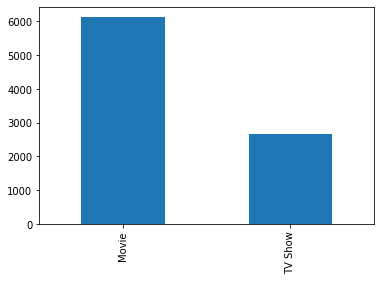

In [1049]:
netflix_df["type"].value_counts().plot.bar()

Another interesting statistic is that the most common release year for a movie on netflix is 2018.

In [1050]:
netflix_df["release_year"].value_counts().idxmax()

2018

Checking the dtypes to make sure that they are properly formatted.

In [1051]:
netflix_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

# Table 2

Another dataset I found is about Amazon Prime Video, which is also from [kaggle.com](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows).  This dataset contains most of the same information as Netflix; however, it has a similar problem.  This is because the data is only relevant to a movie's performance on Amazon.  Amazon Prime has 38 million fewer users; however, it contains a library of 10,000 different movies and TV shows, larger than Netflix’s.  This data contains anything I would need about any movie on Amazon Prime.  This includes its duration, rating, genre, release year, cast, director, etc.  This dataset could be used to answer a variety of different questions.  One possible question could be if certain directors perform better in certain genres.  Another could be if there is a relationship between the genre of a movie and its popularity.


In [1052]:
amazon_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


The amazon dataframe also contains several columns that are not needed for the analysis.  These columns include the show_id, date_added, and the description.

In [1053]:
amazon_df=amazon_df.drop(columns = ["show_id", "date_added","description"], axis=1)
amazon_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,1989,NaN,45 min,"Drama, Fantasy"


After this, I decided to change all of the different ratings to correspond with the american rating system.  To do this, I identified all of the unique values that Amazon uses, and then converted them to the correct ones.

In [1054]:
amazon_df["rating"].unique()

array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [1055]:
amazon_df["rating"]=amazon_df["rating"].map({
    "All_Ages": "G",
    "ALL":"G",
    "7+":"PG",
    "13+":"PG-13",
    "16+":"PG-13",
    "18+":"R",
    "16":"PG-13",
    "AGES_16":"PG-13",
    "AGES_16_":"PG-13",
    "AGES_18":"R",
    "AGES_18_":"R",
    "NOT_RATE":"UNRATED"

})

An interesting statistic for this dataframe is that the most common country for movies is the United States followed by India.  I am very suprised that India has such a large amount of movies on Amazon Prime Video.  I am very suprised that there are 201 more movies created in India than the United Kingdom.  

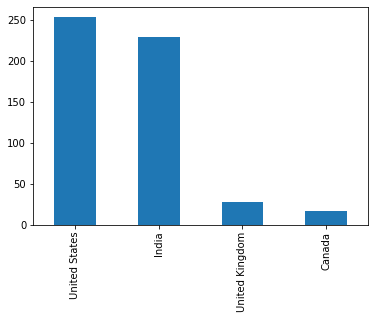

In [1056]:
amazon_df["country"].value_counts()[:4].plot.bar()

In [1057]:
India=amazon_df["country"].value_counts()["India"] #Amount of movies from India
UK = amazon_df["country"].value_counts()["United Kingdom"] #Amount of movies from the United Kingdom
India-UK

201

Checking the dtypes to make that they are properly formatted.

In [1058]:
amazon_df.dtypes

type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

# Table 3

The third dataset I found is from [kaggle.com](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows), which regards IMDB’s database.  This dataset contains IMDB’s top 1000 movies.  IMDB’s dataset contains a movie's name, release year, Meta_Score, IMDB_Rating, runtime, gross earnings, and more.  This dataset would be very useful in answering a variety of questions.  These questions can range from predicting movie earning potential based on its genre and runtime, or which combination of actors generates the best ratings.  The main downside of this dataset is that it only contains the most successful movies and does not have any outliers.  


In [1059]:
IMDB_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


There are some columns that are not necessariy for the analysis.  This includes the overview of the movie and the poster for it.  Due to this I am going to remove it from the dataframe.

In [1060]:
IMDB_df=IMDB_df.drop(columns = ["Poster_Link", "Overview"], axis=1)
IMDB_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Additionally the current Certificate ratings is for the Central Board of Film Certification.  This system is used for India.  For the dataframe I am going to convert it to the american ranking system.

In [1061]:
IMDB_df["Certificate"]=IMDB_df["Certificate"].map({
    "A": "R",
    "U":"PG",
    "UA":"PG-13",
    "U/A":"PG-13",
    "S":"NC-17"
})
IMDB_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,R,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,R,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,R,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,PG,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


One interesting statistic from this data is that the majority of movies in the top 1000 movies are rated PG, followed by R.  I find this very interesting that PG-13 movies are last because they are the middle ranking in terms of their certificate.

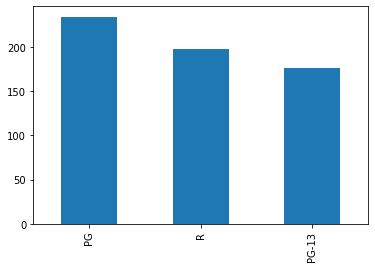

In [1062]:
IMDB_df["Certificate"].value_counts().plot.bar()

Another interesting statistic is that Tom Hanks is the most popular lead actor in the top 1000 movies with having directed 12 movies.

In [1063]:
IMDB_df["Star1"].value_counts().idxmax()
IMDB_df["Star1"].value_counts()["Tom Hanks"]

12

Checking the dtypes to make sure that they are properly formatted.

In [1064]:
IMDB_df.dtypes

Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#Mergin the Data 

In order to make any analysis over the entirety of the movie industry I needed to merge my dataframes.  I decided to not use the Neflix datadue to there being a lot of repeats with the amazon prime one, as well as it containing several errors.  These errors include having some runtimes in its rating system.  Also, with both the Amazon and IMDB data, there is almost 10,000 movies.  To merge these data frames, I needed to make some significant changes to the data and merge them.  To do this, I rename several of the columns and remove any irrelevant ones.  By doing this, it leaves me with a dataframe that contains all of the movies from the IMDB and amazon datasources.

In [1065]:
IMDB_df["cast"]=IMDB_df["Star1"]+", "+IMDB_df["Star2"]+", "+IMDB_df["Star3"]+", "+IMDB_df["Star4"]
IMDB_df=IMDB_df.drop(columns = ["Star1","Star2","Star3","Star4","IMDB_Rating","No_of_Votes","Gross","Meta_score"])
IMDB_df.loc[:,'type'] = str('Movie')
IMDB_df = IMDB_df.rename(columns={'Director':'director','Released_Year': 'release_year','Genre':'listed_in','Series_Title':'title','Certificate':'rating',"Runtime":"duration"})
movies_df=pd.concat([IMDB_df, amazon_df],axis=0)
movies_df=movies_df[movies_df["type"]=="Movie"]
movies_df=movies_df.drop(columns = ["type","country"])
movies_df['duration'] = movies_df['duration'].str.replace(r' min$', '')
movies_df["duration"]=movies_df["duration"].astype(float)
movies_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,title,release_year,rating,duration,listed_in,director,cast
0,The Shawshank Redemption,1994,R,142.0,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,R,175.0,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,The Dark Knight,2008,PG-13,152.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,The Godfather: Part II,1974,R,202.0,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian..."
4,12 Angry Men,1957,PG,96.0,"Crime, Drama",Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ..."


# Exploratory Analysis

Now that the data is organized into one dataframe, I am able to look for different patterns that it has.  The first pattern that I looked for was which genre was the most common.

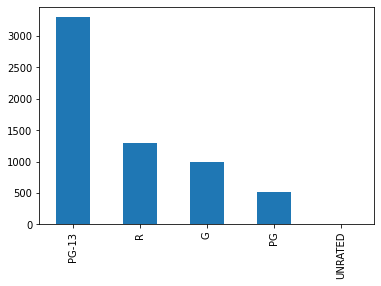

In [1066]:
ratings=movies_df["rating"].value_counts().iloc[:]
ratings.dropna()
fig=ratings.plot.bar()

This graph shows that the most common movies are rated PG-13 by a sigificant amount.  Additionally, there are not a log of PG movies compared to the other categories.

I also wanted to see if there is an association between a movie's rating and its runtime.  To do this, I grouped these two columns together and created a bar graph.

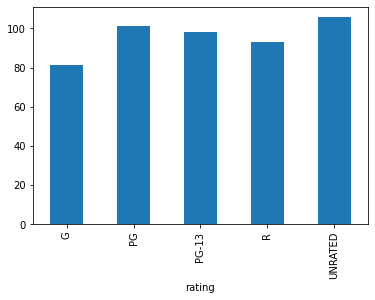

In [1067]:
ratings=movies_df.groupby("rating")["duration"].mean()
ratings.plot.bar()

Based on this graph, it is evident that movies that with a PG or PG-13 rating have almost an identical runtime.  It is also intersting that movies that have a G rating are typically shorter than other types of movies.

Another way that this data could be analyzed would be through their genre.  However, the dataframe is currently storing all of the movies genre's in one column, so I will need to create a new dataframe.  This dataframe is created by seperating each genre a movie has into its own entry.

In [1068]:
movies_df["listed_in_new"] = movies_df["listed_in"].apply(lambda x: x.split(","))
exploded_movies = movies_df.explode("listed_in_new").reset_index(drop=True)
exploded_movies['listed_in_new'] = exploded_movies['listed_in_new'].str.replace(" ", "")

After doing this, I wanted to see if a movies runtime is associated with its genre.  I created a boxplot to display the 6 most common movie genres and their corresponding runtime.  I also created new dataframes for each of the six most popular movie genres to use for other comparisons.

In [1069]:
exploded_movies['listed_in_new'].value_counts()[:6].index.tolist()

['Drama', 'Comedy', 'Action', 'Suspense', 'Horror', 'Romance']

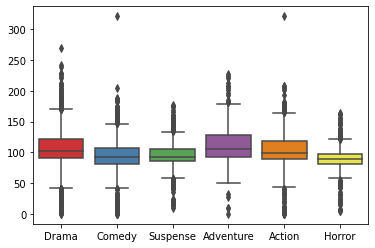

In [1070]:
Drama=exploded_movies[exploded_movies['listed_in_new']=='Drama']
Comedy=exploded_movies[exploded_movies['listed_in_new']=='Comedy']
Suspense=exploded_movies[exploded_movies['listed_in_new']=='Suspense']
Action=exploded_movies[exploded_movies['listed_in_new']=='Action']
Adventure=exploded_movies[exploded_movies['listed_in_new']=='Adventure']
Horror=exploded_movies[exploded_movies['listed_in_new']=='Horror']

PopularGenre = pd.DataFrame({'Drama': Drama['duration'],'Comedy': Comedy['duration'],'Suspense': Suspense['duration'],'Adventure': Adventure['duration'],'Action': Action['duration'],'Horror':Horror['duration']})
sns.boxplot(data=PopularGenre, palette='Set1')
plt.show()

This grap showed a few different trends.  The most noticable one is that adventure and drama movies are usually longer than horror and suspense movies.  Additionally, horror and suspense movies have very similar runtimes.

I also wanted to see if there is any connection between a movie's genre and its rating.  To analyze this, I created four different pie charts that are comparing the four most common genres.



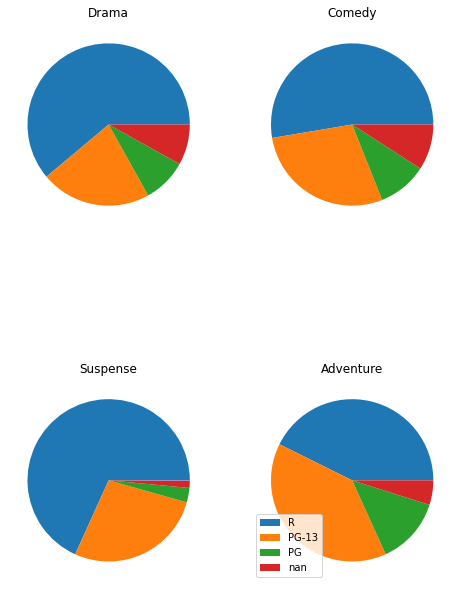

In [1071]:
fig, ax= plt.subplots(2,2, figsize=(8,12))
ax[0,0].pie(Drama["rating"].value_counts().iloc[:])
ax[0,1].pie(Comedy["rating"].value_counts().iloc[:])
ax[1,0].pie(Suspense["rating"].value_counts().iloc[:])
ax[1,1].pie(Adventure["rating"].value_counts().iloc[:])
labels=Drama["rating"].unique()
ax[0, 0].set_title("Drama")
ax[0, 1].set_title("Comedy")
ax[1, 0].set_title("Suspense")
ax[1, 1].set_title("Adventure")
plt.legend(labels)

Based on the information in the graph, there is a strong association between a movie's genre and its rating.  For example, a suspense is most likely going ot be rated R, but an adventure is most likely going to be PG-13.


Lastly, I wanted to see if there is any relationship between the year a movie was released and its genre.  To do this, I created a boxplot that compares the release years of each of the six most common genres.

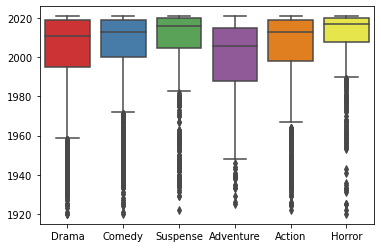

In [1072]:
yearGenre = pd.DataFrame({'Drama': Drama['release_year'],'Comedy': Comedy['release_year'],'Suspense': Suspense['release_year'],'Adventure': Adventure['release_year'],'Action': Action['release_year'],'Horror':Horror['release_year']})
sns.boxplot(data=yearGenre, palette='Set1')

Based on the information, there is a slight association between a movie's gere and its release year.  For example, suspense movies are more likely to come out in recent years.

Based on the data that I have collected, I believe that I will be able to answer the question if you are able to predict a movie's genre based off of its rutime, rating, and release year.  The reason for this is that based on the graphs that I created, movie's with the same genre share different characteristics with eachother.  Additionally, this data can be used to predict a new movie's runtime based off of its rating and genre. 